<a href="https://colab.research.google.com/github/jiiiisoo/Financial_Engineering_yonsei/blob/main/deep_hedging_Asian_Option.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [49]:
r = 0.00 #interest
sig = 0.2 #level of fluctuation of current stock price
T = 30/365 #Time to maturity (30일/360일)

M = 100 #number of path
N = 100 #for one scenrio, I will devide into 30 (더 많이 하면 accuracy 높아짐)

dt = T/N
rdt = r*dt
sigsdt = sig * np.sqrt(dt)

In [50]:
S0 = 100
np.random.seed(20220617)
S = np.empty([M,N+1])
rv = np.random.normal(r*dt,sigsdt,[M,N])

# Monte Carlo method

In [51]:
for i in range(M):
  S[i,0]=S0
  for j in range(N):
    S[i,j+1]=S[i,j]*(1+rv[i,j])

In [52]:
S_avg=[]
Asian_payoff=[]

K=100

for i in range(M):
    S_avg.append(np.mean(S[i,:]))
    Asian_payoff.append(np.maximum(S_avg[i]-K,0))

np.mean(Asian_payoff)*np.exp(-r*T)

1.3032140667213907

# Model

In [7]:
import tensorflow as tf

In [61]:
K=100

my_input = []

premium = tf.keras.layers.Input(shape=(1,), name="premium")
my_input = my_input + [premium]

hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
my_input = my_input + [hedge_cost]

price = tf.keras.layers.Input(shape=(1,), name="price")
my_input = my_input + [price]


for j in range(N):
    
    delta = tf.keras.layers.Dense(32, activation='tanh')(price)
    #delta = tf.keras.layers.BatchNormalization()(delta)
    #delta = tf.keras.layers.Dropout(0.5)(delta)
    #delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    #delta = tf.keras.layers.BatchNormalization()(delta)
    #delta = tf.keras.layers.Dropout(0.5)(delta)
    #delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    #delta = tf.keras.layers.BatchNormalization()(delta)
    #delta=tf.keras.layers.Dropout(0.5)(delta)
    delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    delta = tf.keras.layers.Dense(1)(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="multiply_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price = new_price

payoff = tf.keras.layers.Lambda(lambda x : 0.5*(tf.abs(x/N-K)+x/N-K))(price) #asian 으로 바꿔야 (lambda부분으로 average로)

cum_cost = tf.keras.layers.Add(name="final")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="final_")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost) 

In [62]:
p = 1.3032140667213907 * np.ones([M,1])
c = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [p]+[c]+[SS]
y = np.zeros([M,1])

In [63]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(x,y, epochs=180, verbose=True)

# For different N's

In [83]:
r = 0.00 #interest
sig = 0.2 #level of fluctuation of current stock price
T = 30/365 #Time to maturity (30일/360일)

M = 100 #number of path

Text(0, 0.5, 'Distribution')

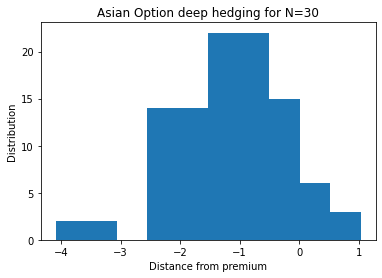

In [73]:
#for N=30
#premium:1.5401476142837958
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging for N=30')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

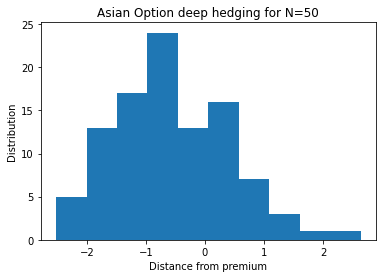

In [63]:
#for N=50
#premium:1.4057170288812584
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging for N=50')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

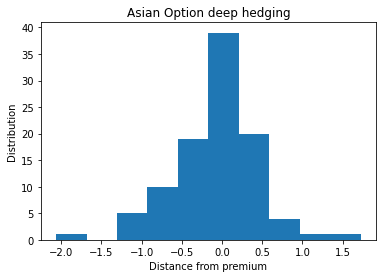

In [84]:
#for N=100
#premium: 1.3032140667213907
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

# For different model

Text(0, 0.5, 'Distribution')

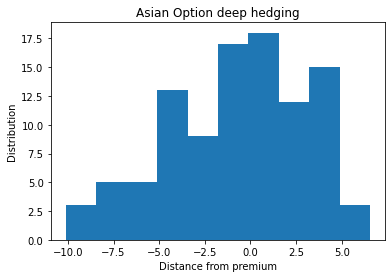

In [89]:
#for N=100
#for 3 more layer
#premium: 1.3032140667213907
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

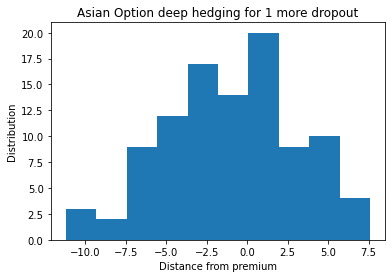

In [12]:
#for N=100
#for 3 more layer
#for 1 more dropout
#premium: 1.3032140667213907
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging for 1 more dropout')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

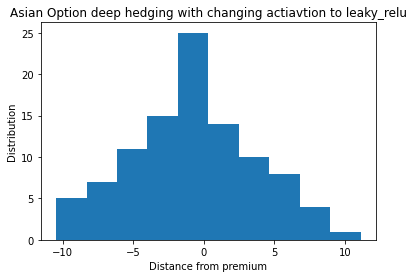

In [12]:
#for N=100
#for 3 more layer
#changing actiavtion to leaky_relu
#premium: 1.3032140667213907
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging with changing actiavtion to leaky_relu')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

# For different epoch

Text(0, 0.5, 'Distribution')

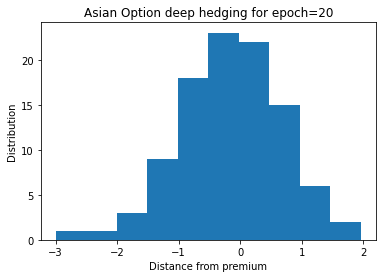

In [59]:
#for epoch=20
#premium:1.3032140667213907
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging for epoch=20')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

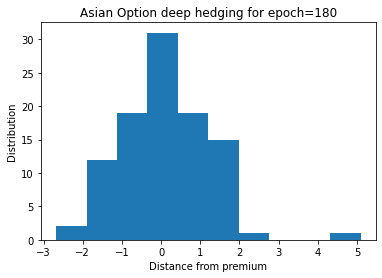

In [65]:
#for epoch=180
#premium:1.3032140667213907
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging for epoch=180')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

# deep hedging

In [1]:
import numpy as np

In [25]:
r = 0.00 #interest
sig = 0.2 #level of fluctuation of current stock price
T = 30/365 #Time to maturity (30일/360일)

M = 100 #number of path
N = 100 #for one scenrio, I will devide into 30 (더 많이 하면 accuracy 높아짐)

dt = T/N
rdt = r*dt
sigsdt = sig * np.sqrt(dt)

In [26]:
S0 = 100
np.random.seed(20220617)
S = np.empty([M,N+1])
rv = np.random.normal(r*dt,sigsdt,[M,N])

In [27]:
for i in range(M):
  S[i,0]=S0
  for j in range(N):
    S[i,j+1]=S[i,j]*(1+rv[i,j])

In [43]:
S_avg=[]
Asian_payoff=[]

K=190

for i in range(M):
    S_avg.append(np.mean(S[i,:]))
    Asian_payoff.append(np.maximum(S_avg[i]-K,0))
    #print(S_avg[i],Asian_payoff[i])

np.mean(Asian_payoff)*np.exp(-r*T)

0.0

In [6]:
import tensorflow as tf

In [44]:
K=190

my_input = []

premium = tf.keras.layers.Input(shape=(1,), name="premium")
my_input = my_input + [premium]

hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
my_input = my_input + [hedge_cost]

price = tf.keras.layers.Input(shape=(1,), name="price")
my_input = my_input + [price]


for j in range(N):
    
    delta = tf.keras.layers.Dense(32, activation='tanh')(price)
    #delta = tf.keras.layers.BatchNormalization()(delta)
    #delta = tf.keras.layers.Dropout(0.5)(delta)
    #delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    #delta = tf.keras.layers.BatchNormalization()(delta)
    #delta = tf.keras.layers.Dropout(0.5)(delta)
    #delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    #delta = tf.keras.layers.BatchNormalization()(delta)
    #delta=tf.keras.layers.Dropout(0.5)(delta)
    delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    delta = tf.keras.layers.Dense(1)(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="multiply_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price = new_price

payoff = tf.keras.layers.Lambda(lambda x : 0.5*(tf.abs(x/N-K)+x/N-K))(price) #asian 으로 바꿔야 (lambda부분으로 average로)

cum_cost = tf.keras.layers.Add(name="final")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="final_")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost) 

In [45]:
p = 0.0 * np.ones([M,1])
c = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [p]+[c]+[SS]
y = np.zeros([M,1])

In [46]:
model.compile(loss='mse', optimizer='adam')

In [47]:
model.fit(x,y, epochs=100, verbose=False)

Text(0, 0.5, 'Distribution')

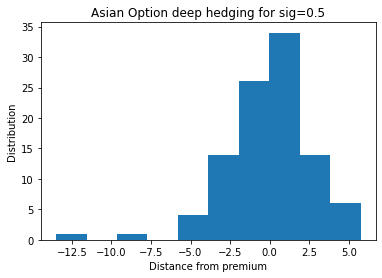

In [22]:
#for N=100
#for sig=0.5
#premium: 3.2780247725618166
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging for sig=0.5')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

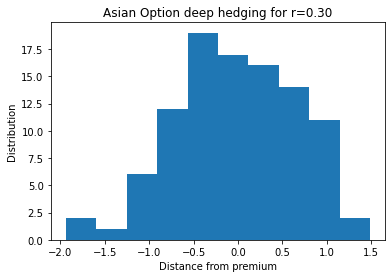

In [15]:
#for N=100
#for r=0.30
#premium: 1.9453773523136602
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging for r=0.30')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

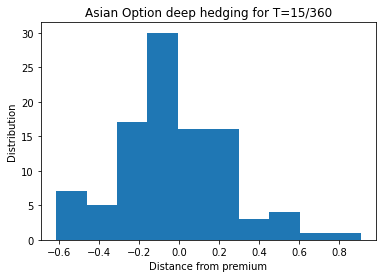

In [24]:
#for N=100
#for T=15/365
#premium: 0.9207221081363286
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging for T=15/360')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

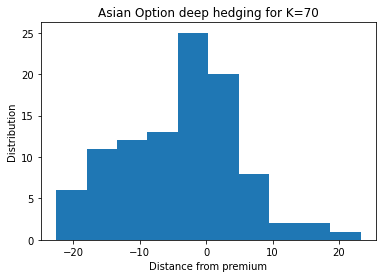

In [42]:
#for N=100
#for K=70
#premium: 30.03481481184628
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging for K=70')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

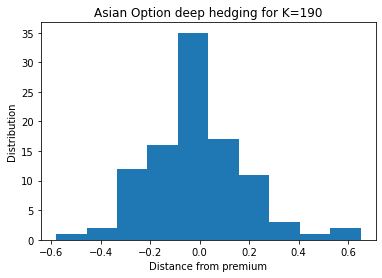

In [48]:
#for N=100
#for K=190
#premium: 0.0
plt.hist(model.predict(x))
plt.title('Asian Option deep hedging for K=190')
plt.xlabel('Distance from premium')
plt.ylabel('Distribution')